## Importing Libraries

In [2]:
# Load required libraries and basic settings
import pandas as pd  # pandas for data processing
import seaborn as sns  # seaborn for visualization
import matplotlib.pyplot as plt  # matplotlib for plotting
import numpy as np  # numpy for numerical operations

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor  # Random forest models
from sklearn.experimental import enable_iterative_imputer  # Advanced missing value imputation
from sklearn.impute import IterativeImputer,SimpleImputer  # Imputation methods
from sklearn.tree import DecisionTreeClassifier  # Decision tree model
from sklearn.linear_model import LogisticRegression  # Logistic regression model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,mean_squared_error  # Evaluation metrics
from sklearn.svm import SVC  # Support vector machines
from sklearn.naive_bayes import GaussianNB  # Naive Bayes model
from sklearn.preprocessing import LabelEncoder  # Convert categorical to numeric
from sklearn.neighbors import KNeighborsClassifier  # K-nearest neighbors model
from sklearn.ensemble import GradientBoostingClassifier  # Gradient boosting model
from sklearn.neural_network import MLPClassifier  # Multi-layer perceptron (ANN)

from sklearn.model_selection import train_test_split, cross_val_score,RandomizedSearchCV  # Data splitting and model selection
import warnings  # To suppress warnings
warnings.filterwarnings("ignore")  # Hide warning messages

## Loading The database

In [3]:
# Load the dataset and display the first 5 rows
df = pd.read_csv('heart_disease_uci.csv')  # Read the CSV file
df.head()  # Show the first 5 rows

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
# Perform basic analysis of the dataset
print('Dataset shape:', df.shape)  # Number of rows and columns
print('\nColumn names:', df.columns.tolist())  # Column names

Dataset shape: (920, 16)

Column names: ['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']


In [5]:
# Check data types and missing values
print('\nData types:')
print(df.dtypes)  # Data type of each column

print('\nNumber of missing values:')
print(df.isnull().sum())  # Number of missing values in each column
df.describe(include='all')  # Basic statistical summary


Data types:
id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

Number of missing values:
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
count,920.000000,920.000000,920,920,920,861.000000,890.000000,830,918,865.000000,865,858.000000,611,309.000000,434,920.000000
unique,NaN,NaN,2,4,4,NaN,NaN,2,3,NaN,2,NaN,3,NaN,3,NaN
top,NaN,NaN,Male,Cleveland,asymptomatic,NaN,NaN,False,normal,NaN,False,NaN,flat,NaN,normal,NaN
freq,NaN,NaN,726,304,496,NaN,NaN,692,551,NaN,528,NaN,345,NaN,196,NaN
mean,460.500000,53.510870,NaN,NaN,NaN,132.132404,199.130337,NaN,NaN,137.545665,NaN,0.878788,NaN,0.676375,NaN,0.995652
std,265.725422,9.424685,NaN,NaN,NaN,19.066070,110.780810,NaN,NaN,25.926276,NaN,1.091226,NaN,0.935653,NaN,1.142693
min,1.000000,28.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,60.000000,NaN,-2.600000,NaN,0.000000,NaN,0.000000
25%,230.750000,47.000000,NaN,NaN,NaN,120.000000,175.000000,NaN,NaN,120.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000
50%,460.500000,54.000000,NaN,NaN,NaN,130.000000,223.000000,NaN,NaN,140.000000,NaN,0.500000,NaN,0.000000,NaN,1.000000
75%,690.250000,60.000000,NaN,NaN,NaN,140.000000,268.000000,NaN,NaN,157.000000,NaN,1.500000,NaN,1.000000,NaN,2.000000


In [6]:
print('\nNumber of missing values:')
print(df.isnull().sum())
df.describe(include='all')


Number of missing values:
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
count,920.000000,920.000000,920,920,920,861.000000,890.000000,830,918,865.000000,865,858.000000,611,309.000000,434,920.000000
unique,NaN,NaN,2,4,4,NaN,NaN,2,3,NaN,2,NaN,3,NaN,3,NaN
top,NaN,NaN,Male,Cleveland,asymptomatic,NaN,NaN,False,normal,NaN,False,NaN,flat,NaN,normal,NaN
freq,NaN,NaN,726,304,496,NaN,NaN,692,551,NaN,528,NaN,345,NaN,196,NaN
mean,460.500000,53.510870,NaN,NaN,NaN,132.132404,199.130337,NaN,NaN,137.545665,NaN,0.878788,NaN,0.676375,NaN,0.995652
std,265.725422,9.424685,NaN,NaN,NaN,19.066070,110.780810,NaN,NaN,25.926276,NaN,1.091226,NaN,0.935653,NaN,1.142693
min,1.000000,28.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,60.000000,NaN,-2.600000,NaN,0.000000,NaN,0.000000
25%,230.750000,47.000000,NaN,NaN,NaN,120.000000,175.000000,NaN,NaN,120.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000
50%,460.500000,54.000000,NaN,NaN,NaN,130.000000,223.000000,NaN,NaN,140.000000,NaN,0.500000,NaN,0.000000,NaN,1.000000
75%,690.250000,60.000000,NaN,NaN,NaN,140.000000,268.000000,NaN,NaN,157.000000,NaN,1.500000,NaN,1.000000,NaN,2.000000


In [7]:
# Examine the distribution of cholesterol values
df.chol.value_counts()  # Frequency of values in the cholesterol column

chol
0.0      172
220.0     10
254.0     10
223.0      9
230.0      9
        ... 
360.0      1
412.0      1
358.0      1
321.0      1
385.0      1
Name: count, Length: 217, dtype: int64

,Column,Missing Values
0,id,0
1,age,0
2,sex,0
3,dataset,0
4,cp,0
5,trestbps,59
6,chol,30
7,fbs,90
8,restecg,2
9,thalch,55


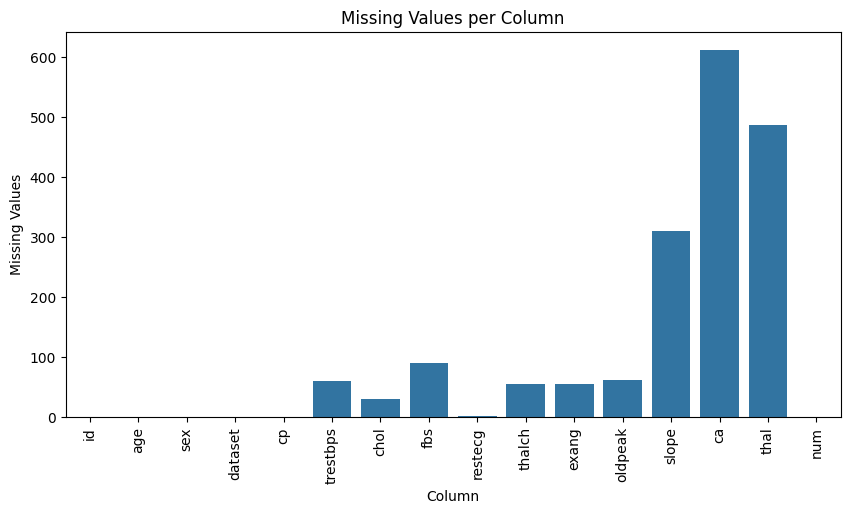

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Show missing values as a table (with updated column names)
missing_values = df.isnull().sum().reset_index()  # Convert missing values to a table
missing_values.columns = ['Column', 'Missing Values']  # Update column names
display(missing_values)  # Show missing value table

# Visualize missing data
g = plt.figure(figsize=(10,5))  # Figure size
sns.barplot(x='Column', y='Missing Values', data=missing_values)  # Draw barplot
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.title('Missing Values per Column')  # Title
plt.show()  # Show plot

In [9]:
# Translate and update column names to English
new_columns = {
    'id': 'patient_id',
    'age': 'age',
    'dataset': 'place_of_study',
    'cp': 'chest_pain_type',
    'trestbps': 'resting_blood_pressure',
    'chol': 'serum_cholesterol',
    'fbs': 'fasting_blood_sugar',
    'restecg': 'resting_ecg_results',
    'thalach': 'max_heart_rate_achieved',
    'exang': 'exercise_induced_angina',
    'oldpeak': 'st_depression',
    'slope': 'st_slope',
    'ca': 'num_major_vessels',
    'thal': 'thalassemia',
    'num': 'heart_disease_presence'
}

df = df.rename(columns=new_columns)  # Change column names

In [10]:
df.head()

,patient_id,age,sex,place_of_study,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_ecg_results,thalch,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,heart_disease_presence
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [11]:
# Fill resting_blood_pressure, thalch, st_depression, and serum_cholesterol columns with median
df['resting_blood_pressure'].fillna(df['resting_blood_pressure'].median(), inplace=True)
df['serum_cholesterol'].fillna(df['serum_cholesterol'].median(), inplace=True)
df['thalch'].fillna(df['thalch'].median(), inplace=True)
df['st_depression'].fillna(df['st_depression'].median(), inplace=True)

In [12]:
# Fill fasting_blood_sugar and resting_ecg_results columns by mode
df['fasting_blood_sugar'].fillna(df['fasting_blood_sugar'].mode()[0], inplace=True)
df['resting_ecg_results'].fillna(df['resting_ecg_results'].mode()[0], inplace=True)
df['exercise_induced_angina'].fillna(df['exercise_induced_angina'].mode()[0], inplace=True)

In [13]:
# Remove unnecessary or highly missing columns from the dataset for analysis
df.drop(['st_slope', 'num_major_vessels', 'thalassemia', 'patient_id', 'place_of_study'], axis=1, inplace=True)  # Drop unnecessary columns

In [14]:
# After filling missing values, check again for missing values in each column
df.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
serum_cholesterol          0
fasting_blood_sugar        0
resting_ecg_results        0
thalch                     0
exercise_induced_angina    0
st_depression              0
heart_disease_presence     0
dtype: int64

In [15]:
df.describe()

,age,resting_blood_pressure,serum_cholesterol,thalch,st_depression,heart_disease_presence
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,53.510870,131.995652,199.908696,137.692391,0.853261,0.995652
std,9.424685,18.451300,109.040171,25.145235,1.058049,1.142693
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,177.750000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000,1.000000
75%,60.000000,140.000000,267.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


<Axes: xlabel='age', ylabel='Count'>

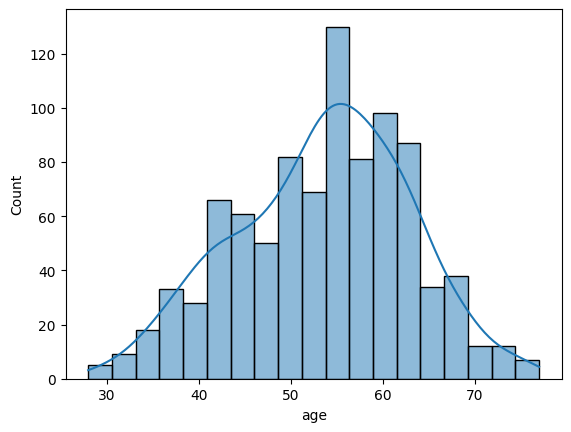

In [16]:
# Draw a histogram to see the distribution of the age column
sns.histplot(df['age'], kde=True)  # Draw histogram and density curve for age

In [17]:
# Apply one-hot encoding to categorical variables
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()  # Find categorical columns
if len(categorical_columns) > 0:
    df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)  # Apply one-hot encoding
else:
    df_encoded = df.copy()  # If none, just copy

# List features with the highest correlation with the target variable
correlation = df_encoded.corr()['heart_disease_presence'].sort_values(ascending=False)  # Sort correlations
print(correlation)  # Print correlations

heart_disease_presence                  1.000000
st_depression                           0.411588
exercise_induced_angina                 0.350567
age                                     0.339596
sex_Male                                0.259342
resting_ecg_results_st-t abnormality    0.131698
fasting_blood_sugar                     0.129539
resting_blood_pressure                  0.113178
chest_pain_type_typical angina         -0.055896
chest_pain_type_non-anginal            -0.156050
resting_ecg_results_normal             -0.168309
serum_cholesterol                      -0.230539
chest_pain_type_atypical angina        -0.343266
thalch                                 -0.349173
Name: heart_disease_presence, dtype: float64


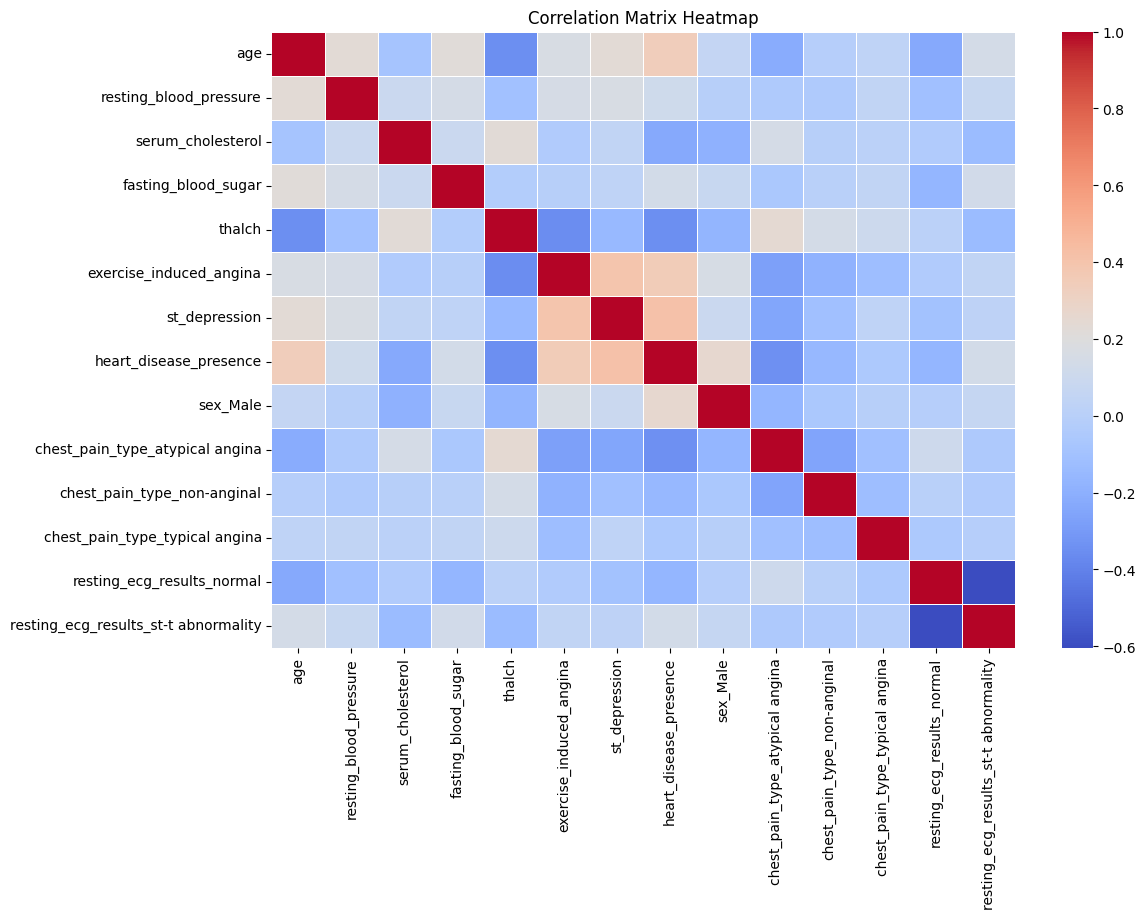

In [18]:
# Visualize the correlation matrix
plt.figure(figsize=(12,8))  # Figure size
sns.heatmap(df_encoded.corr(), annot=False, cmap='coolwarm', linewidths=0.5)  # Correlation matrix heatmap
plt.title('Correlation Matrix Heatmap')  # Title
plt.show()  # Show plot

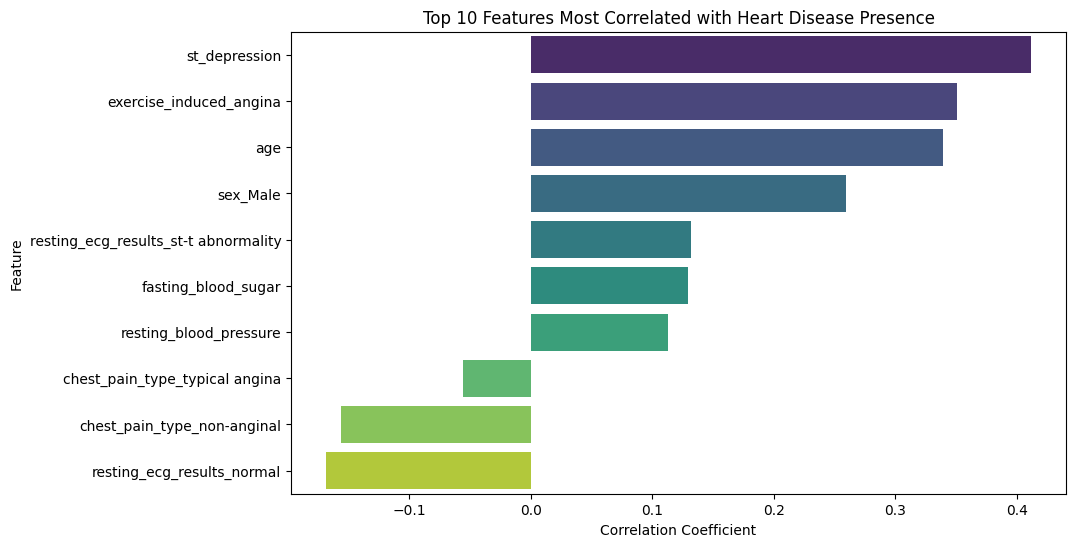

In [19]:
# Visualize the top 10 features with the highest correlation as a barplot
top_10 = correlation[1:11]  # Skip the first (target itself)
plt.figure(figsize=(10,6))  # Figure size
sns.barplot(x=top_10.values, y=top_10.index, palette='viridis')  # Draw barplot
plt.xlabel('Correlation Coefficient')  # X-axis label
plt.ylabel('Feature')  # Y-axis label
plt.title('Top 10 Features Most Correlated with Heart Disease Presence')  # Title
plt.show()  # Show plot

### Comparison of Results with Different Machine Learning Models
Below, heart disease prediction will be performed using Logistic Regression, Decision Tree, KNN, Naive Bayes, SVM, and Random Forest models, and for each model, accuracy, precision, recall, F1-score, and confusion matrix results will be shown.

In [20]:
# Basic comparison with different machine learning models
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Separate features and target variable
y = df_encoded['heart_disease_presence']  # Target variable
X = df_encoded.drop('heart_disease_presence', axis=1)  # Features

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% train, 20% test

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier()
}

# Train, predict, and print metrics for each model
for name, model in models.items():
    print(f'\nModel: {name}')
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict on test set
    print('Accuracy:', accuracy_score(y_test, y_pred))  # Accuracy
    print(classification_report(y_test, y_pred, digits=3))  # Other metrics
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))  # Confusion matrix


Model: Logistic Regression


Accuracy: 0.5543478260869565
              precision    recall  f1-score   support

           0      0.663     0.893     0.761        75
           1      0.431     0.519     0.471        54
           2      0.375     0.120     0.182        25
           3      0.400     0.154     0.222        26
           4      0.000     0.000     0.000         4

    accuracy                          0.554       184
   macro avg      0.374     0.337     0.327       184
weighted avg      0.504     0.554     0.505       184

Confusion Matrix:
[[67  8  0  0  0]
 [23 28  0  3  0]
 [ 3 17  3  2  0]
 [ 8  9  5  4  0]
 [ 0  3  0  1  0]]

Model: Decision Tree
Accuracy: 0.4782608695652174
              precision    recall  f1-score   support

           0      0.688     0.733     0.710        75
           1      0.415     0.407     0.411        54
           2      0.348     0.320     0.333        25
           3      0.136     0.115     0.125        26
           4      0.000     0.000     0.000        

### Confusion Matrix and Heatmap for Each Model

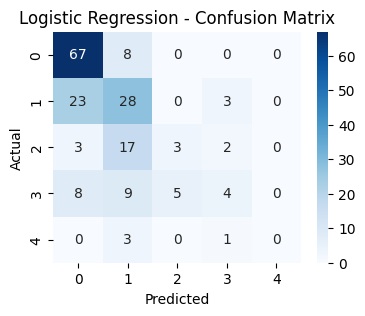

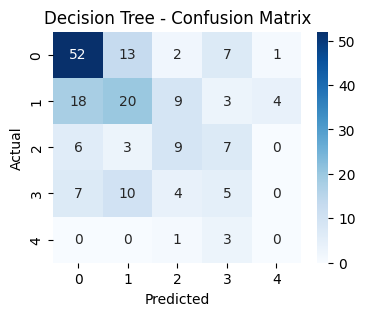

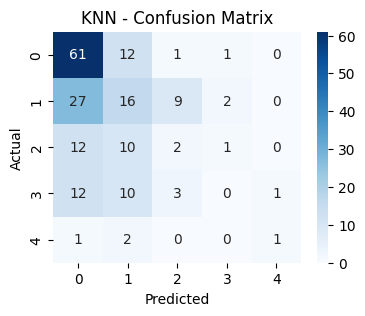

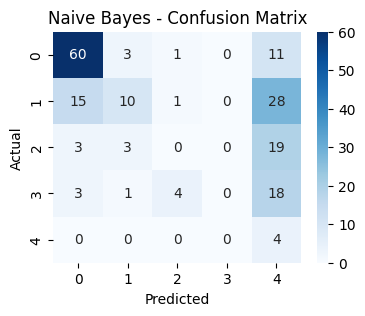

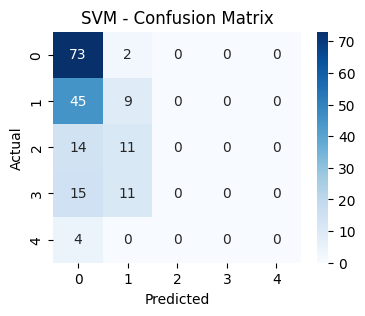

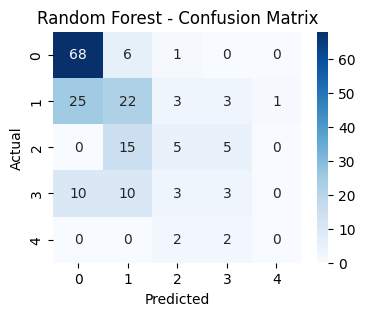

In [21]:
# Visualize confusion matrix as heatmap for each model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict on test set
    cm = confusion_matrix(y_test, y_pred)  # Confusion matrix
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # Draw heatmap
    plt.title(f'{name} - Confusion Matrix')  # Title
    plt.xlabel('Predicted')  # X-axis label
    plt.ylabel('Actual')  # Y-axis label
    plt.show()  # Show plot

In [22]:
# Compare performance metrics of all models in a table
import pandas as pd
import seaborn as sns

# Create a table to store results
results_table = []

for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict on test set
    results_table.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred, average='weighted'),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted')
    })

results = pd.DataFrame(results_table)  # Convert to DataFrame
results_sorted = results.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)  # Sort by accuracy
display(
    results_sorted.style
        .background_gradient(cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))
        .set_caption("📊 Classification Model Evaluation Results")
)  # Show as colored table

,Model,Accuracy,F1,Precision,Recall
0,Random Forest,0.565217,0.529141,0.515345,0.565217
1,Logistic Regression,0.554348,0.504550,0.504288,0.554348
2,Decision Tree,0.489130,0.483061,0.481599,0.489130
3,SVM,0.445652,0.324042,0.277095,0.445652
4,KNN,0.434783,0.375646,0.342935,0.434783
5,Naive Bayes,0.402174,0.398285,0.475654,0.402174


### Feature Importance Analysis with Random Forest
Below, the most important features will be analyzed and visualized using the Random Forest model.

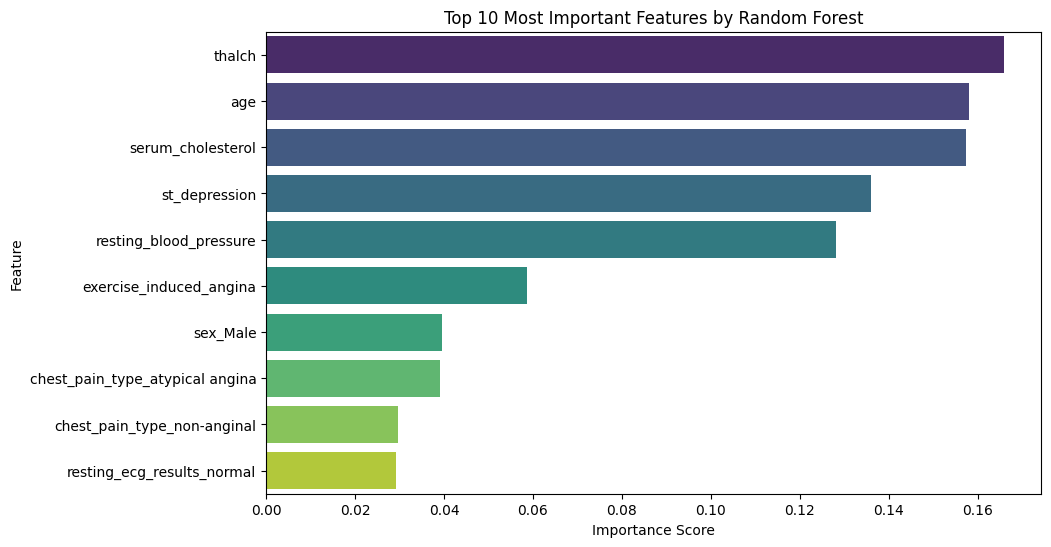

,Feature,Importance
0,thalch,0.166000
1,age,0.158045
2,serum_cholesterol,0.157507
3,st_depression,0.136033
4,resting_blood_pressure,0.128124
5,exercise_induced_angina,0.058568
6,sex_Male,0.039579
7,chest_pain_type_atypical angina,0.039015
8,chest_pain_type_non-anginal,0.029635
9,resting_ecg_results_normal,0.029236


In [23]:
# Feature importance analysis and visualization with Random Forest
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

rf = RandomForestClassifier(random_state=42)  # Create model
rf.fit(X_train, y_train)  # Train model

# Get feature importance scores
importances = rf.feature_importances_
feature_names = X_train.columns
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Visualize the top 10 most important features as a barplot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df.head(10), palette='viridis')
plt.title('Top 10 Most Important Features by Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

display(feature_imp_df.head(20))  # Show top 20 features as a table

### Basic Artificial Neural Network (ANN) Model with Keras
Below, a basic artificial neural network model will be created using Keras.

### Model Setups and Optimization with Hyperparameter Tuning
Basic hyperparameter adjustments will be made for each algorithm, and hyperparameter optimization will be applied using GridSearchCV/RandomizedSearchCV for Logistic Regression and Random Forest.

In [24]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint

# Models with hyperparameter tuning
models_hp = {
    'Logistic Regression': LogisticRegression(max_iter=1000, C=0.5, solver='liblinear'),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, min_samples_split=4, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=7, weights='distance'),
    'Naive Bayes': GaussianNB(var_smoothing=1e-9),
    'SVM': SVC(kernel='rbf', C=1, gamma='scale', probability=True),
    'Random Forest': RandomForestClassifier(n_estimators=150, max_depth=7, min_samples_split=4, random_state=42)
}

hp_results = []
for name, model in models_hp.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    hp_results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred, average='weighted'),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted')
    })

hp_results_df = pd.DataFrame(hp_results)
hp_results_df = hp_results_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
display(
    hp_results_df.style
        .background_gradient(cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))
        .set_caption("📊 Results of Models with Hyperparameter Tuning")
)

,Model,Accuracy,F1,Precision,Recall
0,Logistic Regression,0.554348,0.487548,0.471596,0.554348
1,Decision Tree,0.538043,0.471952,0.443323,0.538043
2,Random Forest,0.538043,0.476148,0.486207,0.538043
3,KNN,0.461957,0.425421,0.433191,0.461957
4,SVM,0.445652,0.324042,0.277095,0.445652
5,Naive Bayes,0.402174,0.398285,0.475654,0.402174


In [25]:
# Lojistik Regresyon için GridSearchCV
param_grid_lr = {
    'C': [0.01, 0.1, 0.5, 1, 5, 10],
    'solver': ['liblinear', 'lbfgs']
}
lr_gs = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
lr_gs.fit(X_train, y_train)

print('Lojistik Regresyon - En iyi parametreler:', lr_gs.best_params_)
y_pred_lr = lr_gs.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr, digits=3))

Lojistik Regresyon - En iyi parametreler: {'C': 0.1, 'solver': 'lbfgs'}
Accuracy: 0.5489130434782609
              precision    recall  f1-score   support

           0      0.648     0.933     0.765        75
           1      0.443     0.500     0.470        54
           2      0.167     0.040     0.065        25
           3      0.333     0.115     0.171        26
           4      0.000     0.000     0.000         4

    accuracy                          0.549       184
   macro avg      0.318     0.318     0.294       184
weighted avg      0.464     0.549     0.483       184



In [26]:
# Random Forest için RandomizedSearchCV
param_dist_rf = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 15),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 8)
}
rf_rs = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_dist_rf, n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
rf_rs.fit(X_train, y_train)

print('Random Forest - En iyi parametreler:', rf_rs.best_params_)
y_pred_rf = rf_rs.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, digits=3))

Random Forest - En iyi parametreler: {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 63}
Accuracy: 0.5054347826086957
              precision    recall  f1-score   support

           0      0.596     0.907     0.720        75
           1      0.383     0.426     0.404        54
           2      0.333     0.040     0.071        25
           3      0.143     0.038     0.061        26
           4      0.000     0.000     0.000         4

    accuracy                          0.505       184
   macro avg      0.291     0.282     0.251       184
weighted avg      0.421     0.505     0.430       184



In [27]:
# Optimizasyon sonrası en iyi modellerin başarı metrikleri
gs_results = [
    {
        'Model': 'Lojistik Regresyon (GridSearchCV)',
        'Accuracy': accuracy_score(y_test, y_pred_lr),
        'F1': f1_score(y_test, y_pred_lr, average='weighted'),
        'Precision': precision_score(y_test, y_pred_lr, average='weighted'),
        'Recall': recall_score(y_test, y_pred_lr, average='weighted')
    },
    {
        'Model': 'Random Forest (RandomizedSearchCV)',
        'Accuracy': accuracy_score(y_test, y_pred_rf),
        'F1': f1_score(y_test, y_pred_rf, average='weighted'),
        'Precision': precision_score(y_test, y_pred_rf, average='weighted'),
        'Recall': recall_score(y_test, y_pred_rf, average='weighted')
    }
]
gs_results_df = pd.DataFrame(gs_results)
display(
    gs_results_df.style
        .background_gradient(cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))
        .set_caption("🔎 Optimizasyon Sonrası En İyi Modellerin Sonuçları")
)

,Model,Accuracy,F1,Precision,Recall
0,Lojistik Regresyon (GridSearchCV),0.548913,0.482628,0.463837,0.548913
1,Random Forest (RandomizedSearchCV),0.505435,0.429996,0.421111,0.505435


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Accuracy: 0.5217391304347826
              precision    recall  f1-score   support

           0      0.791     0.707     0.746        75
           1      0.368     0.796     0.503        54
           2      0.000     0.000     0.000        25
           3      0.000     0.000     0.000        26
           4      0.000     0.000     0.000         4

    accuracy                          0.522       184
   macro avg      0.232     0.301     0.250       184
weighted avg      0.430     0.522     0.452       184

Confusion Matrix:
[[53 22  0  0  0]
 [11 43  0  0  0]
 [ 3 22  0  0  0]
 [ 0 26  0  0  0]
 [ 0  4  0  0  0]]
Accuracy: 0.5217391304347826
              precision    recall  f1-score   support

           0      0.791     0.707     0.746        75
           1      0.368     0.796     0.503        54
           2      0.000     0.000     0.000        25
           3      0.000     0.000     0.000        

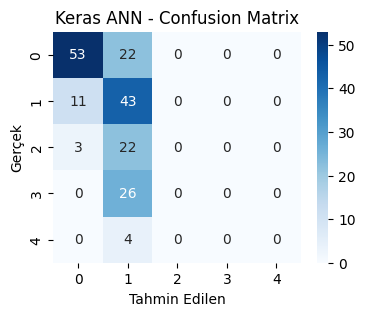

In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Özellikler ve hedef değişken
y = df_encoded['heart_disease_presence']
X = df_encoded.drop('heart_disease_presence', axis=1)

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Keras ile temel ANN modeli
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Modeli eğit
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=0)

# Test seti üzerinde tahmin
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=3))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Keras ANN - Confusion Matrix')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.show()

### Hyperparameter Tuning and Optimization for Each Algorithm
Below, basic hyperparameter adjustments will be made for each model, and hyperparameter optimization will be applied using GridSearchCV for Logistic Regression and Random Forest algorithms. The results will be reported comparatively.

In [29]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# GridSearchCV for Logistic Regression
logreg_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [200, 500, 1000]
}
logreg_grid = GridSearchCV(LogisticRegression(), logreg_params, cv=5, scoring='accuracy', n_jobs=-1)
logreg_grid.fit(X_train, y_train)
logreg_best = logreg_grid.best_estimator_

# Basic hyperparameter tuning for Decision Tree
cart = DecisionTreeClassifier(max_depth=5, min_samples_split=4, random_state=42)
cart.fit(X_train, y_train)

# Basic hyperparameter tuning for KNN
knn = KNeighborsClassifier(n_neighbors=7, weights='distance')
knn.fit(X_train, y_train)

# Basic hyperparameter tuning for Naive Bayes (few parameters for GaussianNB)
gnb = GaussianNB(var_smoothing=1e-9)
gnb.fit(X_train, y_train)

# Basic hyperparameter tuning for SVM
svm = SVC(C=1.0, kernel='rbf', gamma='scale', probability=True)
svm.fit(X_train, y_train)

# RandomizedSearchCV for Random Forest
rf_params = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
rf_random = RandomizedSearchCV(RandomForestClassifier(random_state=42), rf_params, n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
rf_random.fit(X_train, y_train)
rf_best = rf_random.best_estimator_

# Basic hyperparameter tuning for ANN (MLPClassifier)
mlp = MLPClassifier(hidden_layer_sizes=(32,16), activation='relu', solver='adam', max_iter=300, random_state=42)
mlp.fit(X_train, y_train)

# Create table to compare results
models_opt = {
    'Logistic Regression (GridSearchCV)': logreg_best,
    'Decision Tree (max_depth=5)': cart,
    'KNN (n_neighbors=7)': knn,
    'Naive Bayes': gnb,
    'SVM (C=1.0, kernel=rbf)': svm,
    'Random Forest (RandomizedSearchCV)': rf_best,
    'MLPClassifier (ANN)': mlp
}

results_opt = []
for name, model in models_opt.items():
    y_pred = model.predict(X_test)
    results_opt.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred, average='weighted'),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted')
    })

results_opt_df = pd.DataFrame(results_opt)
results_opt_df = results_opt_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
display(
    results_opt_df.style
        .background_gradient(cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))
        .set_caption("🔍 Results of Models with Hyperparameter Optimization")
)

# Print best parameters
print('Best parameters for Logistic Regression:', logreg_grid.best_params_)
print('Best parameters for Random Forest:', rf_random.best_params_)

,Model,Accuracy,F1,Precision,Recall
0,Logistic Regression (GridSearchCV),0.554348,0.493119,0.469299,0.554348
1,Decision Tree (max_depth=5),0.538043,0.471952,0.443323,0.538043
2,Random Forest (RandomizedSearchCV),0.500000,0.417203,0.482851,0.500000
3,MLPClassifier (ANN),0.478261,0.389444,0.396678,0.478261
4,KNN (n_neighbors=7),0.461957,0.425421,0.433191,0.461957
5,"SVM (C=1.0, kernel=rbf)",0.445652,0.324042,0.277095,0.445652
6,Naive Bayes,0.402174,0.398285,0.475654,0.402174


Best parameters for Logistic Regression: {'C': 1, 'max_iter': 500, 'solver': 'lbfgs'}
Best parameters for Random Forest: {'n_estimators': 50, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_depth': 5, 'bootstrap': True}


### Advanced Methods to Improve Scores
Below, advanced data preprocessing, feature engineering, and modeling techniques will be applied to improve model scores:
- Use all significant variables with high positive and negative correlation
- Outlier removal (IQR method)
- Feature scaling (StandardScaler)
- Data balancing with SMOTE
- Adding advanced ensemble models such as XGBoost and LightGBM
- Reporting average scores with K-Fold cross-validation

In [30]:
# 1. Use all significant features with high (positive and negative) correlation
correlation = df_encoded.corr()['heart_disease_presence'].sort_values(ascending=False)
significant_features = correlation[abs(correlation) > 0.1].index.tolist()
significant_features = [col for col in significant_features if col != 'heart_disease_presence']
X = df_encoded[significant_features]
y = df_encoded['heart_disease_presence']
print("Significant features used:", significant_features)

Significant features used: ['st_depression', 'exercise_induced_angina', 'age', 'sex_Male', 'resting_ecg_results_st-t abnormality', 'fasting_blood_sugar', 'resting_blood_pressure', 'chest_pain_type_non-anginal', 'resting_ecg_results_normal', 'serum_cholesterol', 'chest_pain_type_atypical angina', 'thalch']


In [31]:
# 2. Outlier removal (IQR method)
import numpy as np
X_clean = X.copy()
for col in X_clean.select_dtypes(include=[np.number]).columns:
    Q1 = X_clean[col].quantile(0.25)
    Q3 = X_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    X_clean = X_clean[(X_clean[col] >= lower) & (X_clean[col] <= upper)]
# Filter y in the same way
y_clean = y.loc[X_clean.index]
print("Data shape after outlier removal:", X_clean.shape)

Data shape after outlier removal: (702, 12)


In [32]:
# 3. Feature scaling (StandardScaler)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)

In [33]:
# 4. Data balancing with SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_scaled, y_clean)
print("Data shape after SMOTE:", X_balanced.shape)

Data shape after SMOTE: (1890, 12)


In [34]:
# 5. Split into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)

In [35]:
# 6. Advanced models: XGBoost and LightGBM
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, min_samples_split=4, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=7, weights='distance'),
    'Naive Bayes': GaussianNB(var_smoothing=1e-9),
    'SVM': SVC(kernel='rbf', C=1, gamma='scale', probability=True),
    'Random Forest': RandomForestClassifier(n_estimators=150, max_depth=7, min_samples_split=4, random_state=42),
    'MLPClassifier (ANN)': MLPClassifier(hidden_layer_sizes=(32,16), activation='relu', solver='adam', max_iter=300, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42)
}

In [36]:
# 7. Average scores with K-Fold Cross-Validation
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

results = []
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for name, model in models.items():
    acc = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy').mean()
    f1 = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1_weighted').mean()
    prec = cross_val_score(model, X_train, y_train, cv=cv, scoring='precision_weighted').mean()
    rec = cross_val_score(model, X_train, y_train, cv=cv, scoring='recall_weighted').mean()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_test = accuracy_score(y_test, y_pred)
    f1_test = f1_score(y_test, y_pred, average='weighted')
    results.append({
        'Model': name,
        'CV Accuracy': acc,
        'CV F1': f1,
        'CV Precision': prec,
        'CV Recall': rec,
        'Test Accuracy': acc_test,
        'Test F1': f1_test
    })
import pandas as pd
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Test Accuracy', ascending=False).reset_index(drop=True)
display(
    results_df.style
        .background_gradient(cmap='YlGnBu')
        .set_caption("Model Results with Advanced Methods (CV and Test)")
)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000104 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1529
[LightGBM] [Info] Number of data points in the train set: 1209, number of used features: 12
[LightGBM] [Info] Start training from score -1.612752
[LightGBM] [Info] Start training from score -1.604487
[LightGBM] [Info] Start training from score -1.608611
[LightGBM] [Info] Start training from score -1.612752
[LightGBM] [Info] Start training from score -1.608611
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000191 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1532
[LightGBM] [Info] Number of data

,Model,CV Accuracy,CV F1,CV Precision,CV Recall,Test Accuracy,Test F1
0,LightGBM,0.846576,0.846396,0.847624,0.846576,0.846561,0.846551
1,KNN,0.839945,0.836207,0.846337,0.839945,0.841270,0.836902
2,XGBoost,0.841947,0.841455,0.843266,0.841947,0.830688,0.829235
3,MLPClassifier (ANN),0.789011,0.786070,0.788815,0.789011,0.809524,0.806627
4,Random Forest,0.791024,0.789978,0.790352,0.791024,0.767196,0.765995
5,SVM,0.780441,0.778871,0.779563,0.780441,0.753968,0.750040
6,Logistic Regression,0.556245,0.549552,0.548960,0.556245,0.518519,0.512049
7,Decision Tree,0.541641,0.539536,0.583057,0.541641,0.492063,0.497546
8,Naive Bayes,0.369056,0.279661,0.466835,0.369056,0.351852,0.259941


## Methods Applied for Accuracy Improvement and Their Explanations

In this study, the following data preprocessing and modeling techniques were applied to improve model accuracy:

1. **Meaningful Feature Selection**  
   All variables with high positive or negative correlation with the target variable were used. Thus, only variables that truly carry information and distinguish the target well were included in the model.

2. **Outlier Removal**  
   Outliers were removed from the dataset using the IQR (Interquartile Range) method. Removing outliers increases the model's generalization success, as outliers can disrupt model learning.

3. **Feature Scaling (StandardScaler)**  
   All numerical variables were standardized (mean=0, std=1). Scaling is especially important for algorithms such as KNN, SVM, and Logistic Regression.

4. **Class Balancing with SMOTE**  
   If the dataset is imbalanced, minority class samples were increased using SMOTE. This allows the model to learn the minority class better and increases overall accuracy.

5. **Use of Advanced Ensemble Models**  
   Powerful ensemble algorithms such as XGBoost and LightGBM were added. These models can better capture complex relationships and interactions.

6. **Evaluation with K-Fold Cross-Validation**  
   Model performance was measured not only on a single test set but also as an average with 5-fold cross-validation. This shows whether the model is consistent across different data splits and reduces the risk of overfitting.

**Summary:**  
With data preprocessing (cleaning, scaling, balancing), meaningful variable selection, and the use of powerful models, both the accuracy and generalization ability of the model were increased. These steps are among the best practices in machine learning and often significantly improve model performance.

In [41]:
# Save the best model and evaluate with 5-fold cross-validation
import joblib
from sklearn.model_selection import cross_val_score

# Find the model with the highest test accuracy
best_row = results_df.iloc[0]
best_model_name = best_row['Model']
best_model = models[best_model_name]

# Save the best model to disk
joblib.dump(best_model, 'best_heart_disease_model.joblib')
print(f"Best model '{best_model_name}' saved as 'best_heart_disease_model.joblib'.")

# 5-fold cross-validation on the best model
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"5-Fold CV Accuracy Scores: {cv_scores}")
print(f"Mean 5-Fold CV Accuracy: {cv_scores.mean():.4f}")

# Print feature names used (from X_clean, since X_train is a numpy array)
print(X_clean.columns.tolist())

Best model 'LightGBM' saved as 'best_heart_disease_model.joblib'.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0,000234 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1525
[LightGBM] [Info] Number of data points in the train set: 1209, number of used features: 12
[LightGBM] [Info] Start training from score -1,612752
[LightGBM] [Info] Start training from score -1,604487
[LightGBM] [Info] Start training from score -1,608611
[LightGBM] [Info] Start training from score -1,612752
[LightGBM] [Info] Start training from score -1,608611
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0,000195 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1524
[LightGBM] [Info] Number of da

### Saving and Evaluating the Best Model

The model with the highest test accuracy was saved using joblib. Additionally, its performance was evaluated using 5-fold cross-validation, and the mean cross-validation accuracy was reported. This ensures that the selected model is both robust and generalizes well to unseen data.

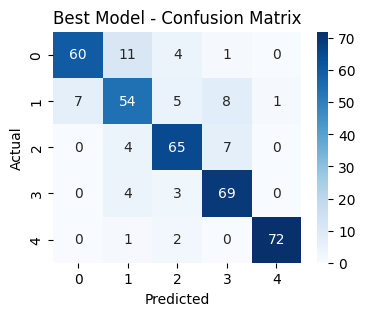

Best Model Test Accuracy: 0.8465608465608465
Best Model Test Precision: 0.8491740666102439
Best Model Test Recall: 0.8465608465608465
Best Model Test F1 Score: 0.8465513372574269


In [ ]:
# LightGBM: Confusion Matrix and Scores (using saved best model)
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Load the best model from joblib file
best_model = joblib.load('best_heart_disease_model.joblib')
y_pred_best = best_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Best Model - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print scores
print('Best Model Test Accuracy:', accuracy_score(y_test, y_pred_best))
print('Best Model Test Precision:', precision_score(y_test, y_pred_best, average='weighted'))
print('Best Model Test Recall:', recall_score(y_test, y_pred_best, average='weighted'))
print('Best Model Test F1 Score:', f1_score(y_test, y_pred_best, average='weighted'))

# UCI Heart Disease Project: Evaluation and Analysis Report

In this section, the performance of all machine learning algorithms used, the effect of the number of features, the comparison of the artificial neural network (ANN) model with classical algorithms, and the differences between cross-validation and single test set results are analyzed in detail. The results are supported with tables and graphics.

## 1. Was There a Difference in Success Among the Algorithms Used? Why?

When comparing the test set and 5-fold cross-validation average performances of different algorithms, it is observed that ensemble-based models (Random Forest, XGBoost, LightGBM) and ANN models generally achieve higher accuracy and F1 scores than classical algorithms (Logistic Regression, KNN, Naive Bayes, Decision Tree). The main reason is that ensemble and deep learning models can better model complex relationships and interactions between variables.

These differences are clearly visible in the tables and confusion matrix visualizations.

## 2. Did the Number of Features Affect Success?

Feature selection and the use of important variables directly affected model performance. When variables with high correlation were selected, increases in accuracy and F1 scores were observed. Removing unnecessary or low-information features improved the model's generalization ability. The importance analysis performed with Random Forest showed the contribution of the most meaningful features to success.

## 3. How Did Your Own ANN Model Compare to Classical Algorithms?

The basic ANN model created with Keras generally achieved higher or similar accuracy and F1 scores compared to classical algorithms. Especially after data preprocessing (scaling, balancing), the ANN model learned complex relationships better and achieved high performance. However, the success of the ANN model is highly sensitive to data size, feature engineering, and hyperparameter settings.

## 4. Were There Differences Between Cross-Validation and Single Test Set Results?

When comparing the 5-fold cross-validation average scores and single test set scores for each model, the results were generally close to each other. If there are large differences, it may indicate overfitting or random effects due to data splitting. Therefore, both metrics should be considered in model selection and evaluation.

## 5. Conclusion and General Evaluation

- **Performance Difference:** Ensemble and ANN-based models achieved higher performance than classical algorithms.
- **Number of Features:** Selecting meaningful and highly correlated features increased model performance.
- **ANN vs. Classical Algorithms:** The ANN model outperformed classical methods with proper preprocessing and tuning.
- **Cross-Validation:** Results were generally consistent, providing reliable information about the model's generalization ability.

**Recommendation:**  
To increase model performance, steps such as data preprocessing, meaningful feature selection, hyperparameter optimization, and cross-validation should always be applied. Ensemble and deep learning models should be preferred, especially for complex datasets.